In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

mag = pd.read_csv(r"C:\Users\cacam\Downloads\Mag-Test_tmp.csv", delimiter=',')

samples = mag['Sample']
times = mag['Time (s)']
voltages = mag['Voltage 0 (V)']


seis = pd.read_csv(r"C:\Users\cacam\Downloads\seismo_test.csv", delimiter=',')

sam = seis['Sample']
tim = seis['Time (s)']
z = seis['Channel Z (V)']
n = seis['Channel N (V)']
e = seis['Channel E (V)']
#print(len(times))

In [29]:
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout

warnings.simplefilter('ignore')

x = times 
y = voltages 

def plot_with_slider(xlim):
    
    window_size = 10
    y_smoothed = y.rolling(window=window_size).mean()
    
    plt.figure(figsize=(19, 8))   ## dpi breaks slider
    
    plt.plot(x, y_smoothed, linewidth = 1.5, label = 'Signal')
    plt.xlim(xlim, xlim + 10)   
    plt.ylim(y.min() , y.max() - 0.5) 
    '''
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.title("Electromagentic Data", fontweight = 'bold', fontsize = 25)
    plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
    plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
    '''
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (times[len(times)-1]), step = 3, value = 0, layout=Layout(width='980px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='980px'), max=306.769961,…

<function __main__.plot_with_slider(xlim)>

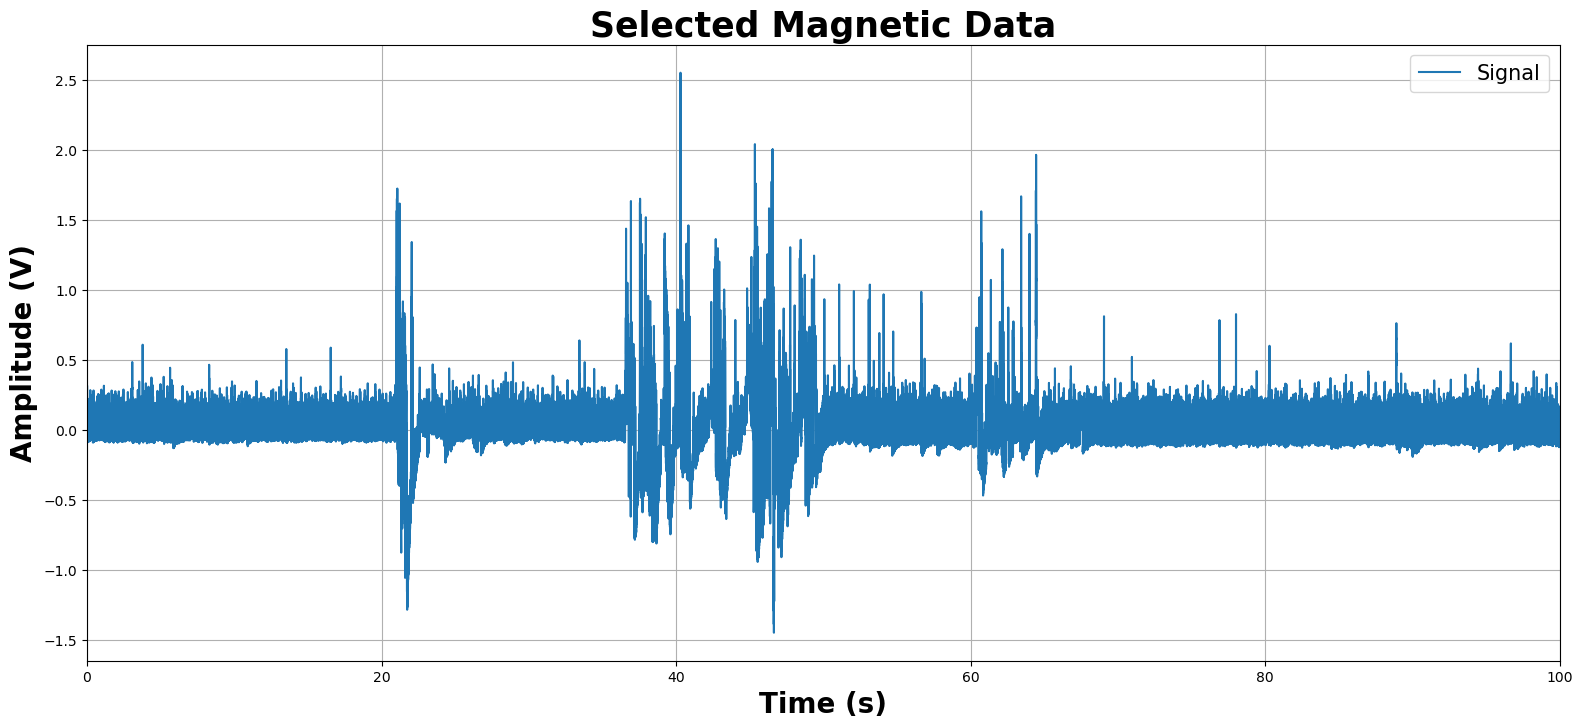

In [12]:
warnings.simplefilter('ignore')

start = 0  ##in terms of seconds 
end = 100   # times[len(times)-1]

i = 0
j = 0

for i in range(0, len(times)):
    if round(times[i]) == start:
        alpha = samples[i]
        break
        
for j in range(0, len(times)):
    if times[j] == end:
        beta = samples[j]
        break


t = times[alpha:beta]
v = voltages[alpha:beta]


window_size = 10
v_smooth = v.rolling(window=window_size).mean()

plt.figure(figsize = (19, 8))
plt.plot(t,v_smooth, label = 'Signal')
#'''
plt.legend(loc = 'upper right', fontsize = 15)
plt.title("Selected Magnetic Data", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.xlim(start,end)
plt.grid(True)
#plt.savefig("mag_selc.pdf")


25001


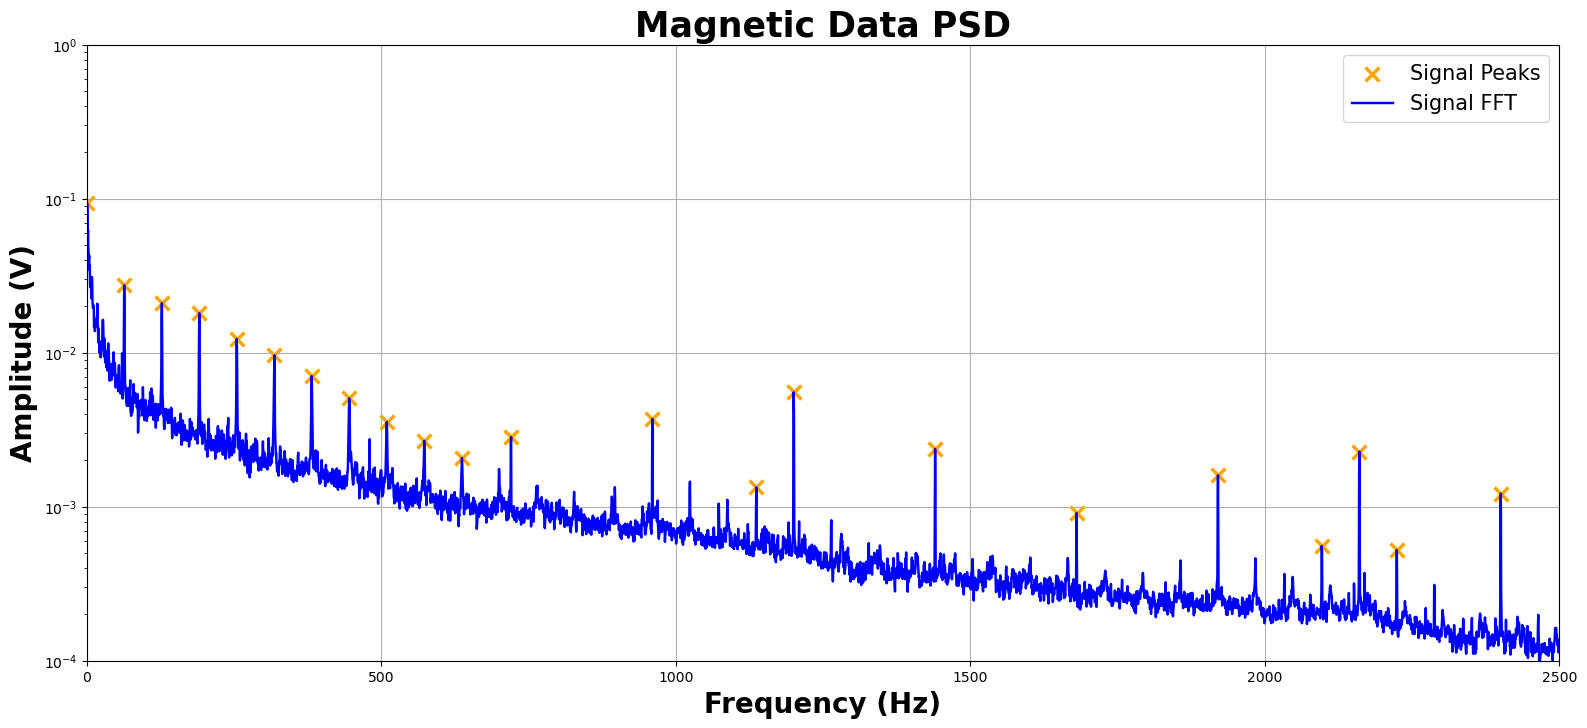

In [68]:
warnings.simplefilter('ignore')

from scipy import signal

f_v, Pxx_den_v = signal.welch(v, 25600, window='hamming', nperseg=50000) 

l = np.log(Pxx_den_v)

peaks, _ = signal.find_peaks(l, prominence = 2, distance = 20)

plt.figure(figsize = (19, 8))

plt.scatter(f_v[peaks], Pxx_den_v[peaks]**0.5, s = 100, color = 'orange', marker = 'x', linewidths = 2.5, label = 'Signal Peaks')
plt.semilogy(f_v, Pxx_den_v ** 0.5, color = 'blue', linewidth = 1.75, label = 'Signal FFT')
#'''
plt.legend(loc = "upper right", fontsize = 15)
plt.title("Magnetic Data PSD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.ylim(10e-5,1)
plt.xlim(0,2500)
plt.grid(True)
#plt.savefig("semilogy_plot.pdf")

k = 0


#with open (r"C:\Users\cacam\Documents\25600_peaks.txt",'w') as f:
 #       f.write('Frequency Peaks' + '\n')
  #      for k in range(0, len(f_v[peaks])):
   #         f.write(str(f_v[peaks][k]) + '\n')

            

In [58]:
warnings.simplefilter('ignore')

from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout


x1 = tim 
y1 = z
y2 = n
y3 = e

Min = min(y1.min(), y2.min(), y3.min())
Max = max(y1.max(), y2.max(), y3.max())


def plot_with_slider(xlim):

    plt.figure(figsize=(19, 8))   ## dpi breaks slider
    
    plt.plot(x1, y1, linewidth = 1.75, color = 'black', label = 'Z')
    plt.plot(x1, y2, linewidth = 1.75, color = 'red', label = 'N')
    plt.plot(x1, y3, linewidth = 1.75, color = 'mediumblue', label = 'E')
    '''
    plt.legend(loc = "upper right", fontsize = 15)
    plt.title("Seismic Data", fontweight = 'bold', fontsize = 25)
    plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
    plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
    '''
    plt.xlim(xlim, xlim + 10)   
    plt.ylim(Min - 2, Max + 1) 
    #plt.axhline()
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (tim[len(tim)-1]), step = 3, value = 0, layout=Layout(width='980px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='980px'), max=17.066602, …

<function __main__.plot_with_slider(xlim)>

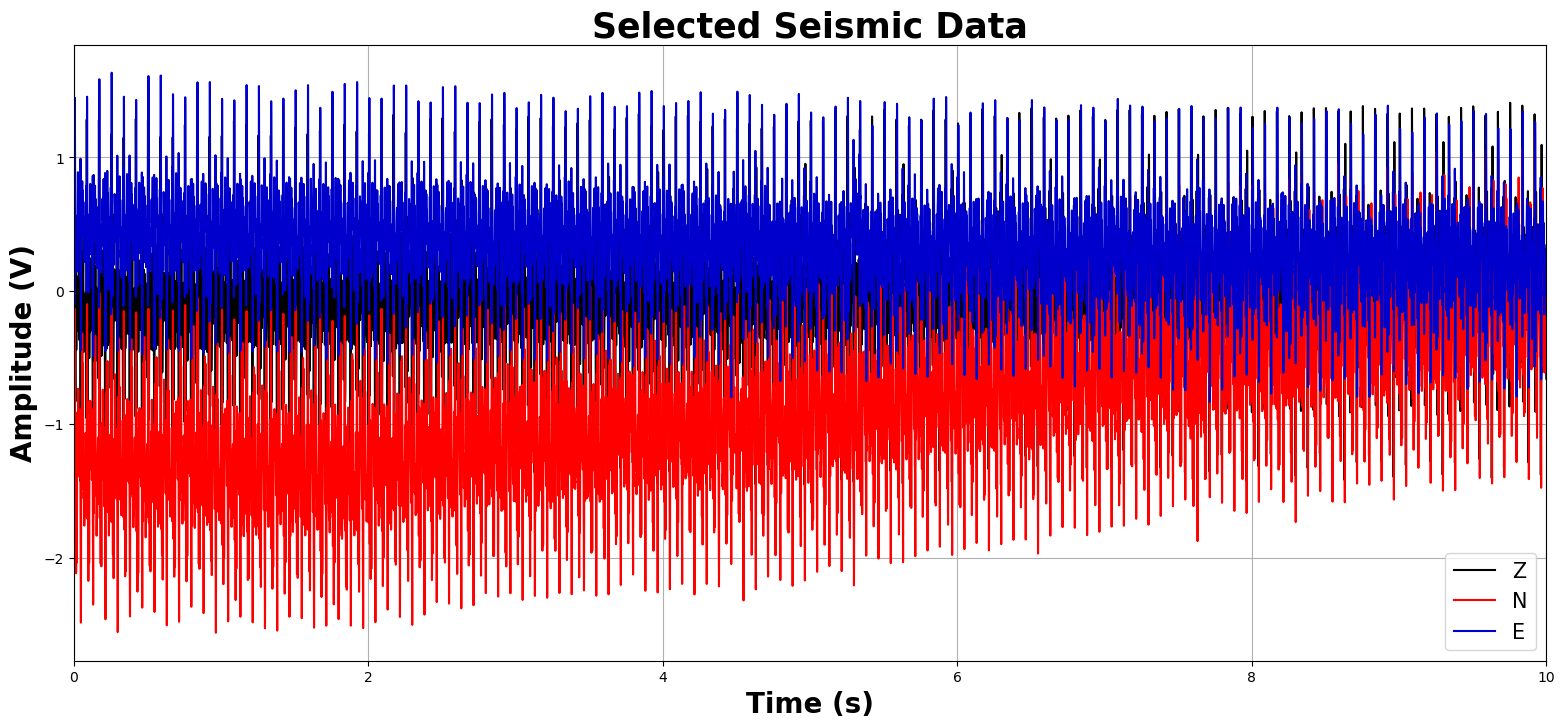

In [59]:
warnings.simplefilter('ignore')

start = 0  ##in terms of seconds 
end = 10   # times[len(times)-1]

a = 0
b = 0

for a in range(0, len(tim)):
    if tim[a] == start:
        gamma = sam[a]
        break
        
for b in range(0, len(tim)):
    if tim[b] == end:
        delta = sam[b]
        break

t1 = tim[gamma:delta]
z1 = z[gamma:delta]
n1 = n[gamma:delta]
e1 = e[gamma:delta]


plt.figure(figsize = (19, 8))
    
plt.plot(t1,z1, linewidth = 1.5, color = 'black', label = 'Z')
plt.plot(t1,n1, linewidth = 1.5, color = 'red', label = 'N')
plt.plot(t1,e1, linewidth = 1.5, color = 'mediumblue', label = 'E')

#'''
plt.legend(loc = "lower right", fontsize = 15)
plt.title("Selected Seismic Data", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.xlim(start,end)
plt.grid(True)
plt.savefig("seismo_selc.pdf")

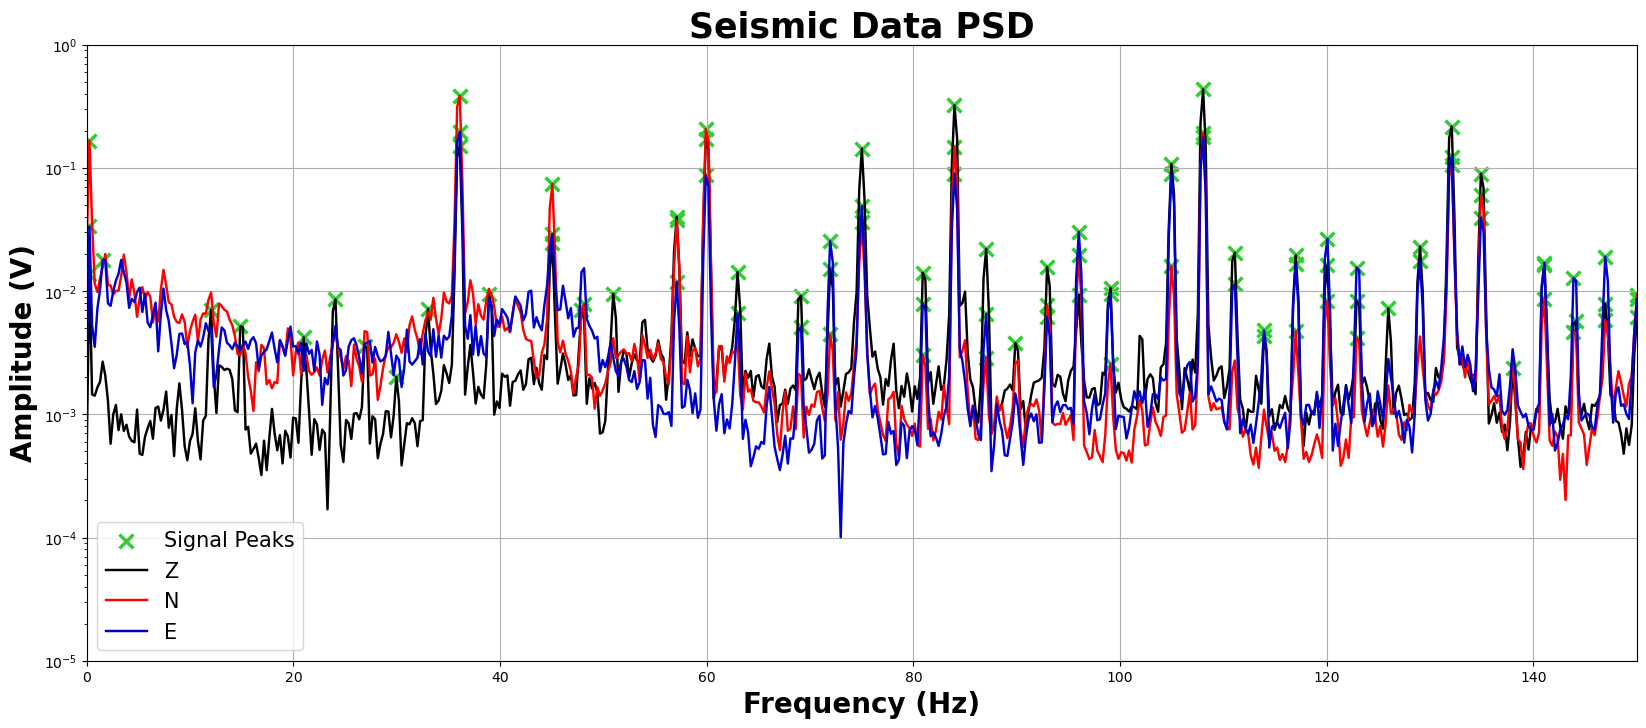

In [87]:
warnings.simplefilter('ignore')

from scipy import signal

f_z, Pxx_den_z = signal.welch(z1, 25600, window='hamming', nperseg=100000) #1651.612903
f_n, Pxx_den_n = signal.welch(n1, 25600, window='hamming', nperseg=100000)
f_e, Pxx_den_e = signal.welch(e1, 25600, window='hamming', nperseg=100000)

log_z = np.log(Pxx_den_z)
log_n = np.log(Pxx_den_n)
log_e = np.log(Pxx_den_e)

peak_z, _ = signal.find_peaks(log_z, prominence = 3)
peak_n, _ = signal.find_peaks(log_n, prominence = 3)
peak_e, _ = signal.find_peaks(log_e, prominence = 3)

#print(f_z[peak_z])

plt.figure(figsize = (20, 8))#, dpi = 2500)

plt.scatter(f_z[peak_z], Pxx_den_z[peak_z]**0.5, s = 100, color = 'limegreen', marker = 'x', linewidths = 2.5, label = 'Signal Peaks')
plt.scatter(f_n[peak_n], Pxx_den_n[peak_n]**0.5, s = 100, color = 'limegreen', marker = 'x', linewidths = 2.5)
plt.scatter(f_e[peak_e], Pxx_den_e[peak_e]**0.5, s = 100, color = 'limegreen', marker = 'x', linewidths = 2.5)

plt.semilogy(f_z, Pxx_den_z ** 0.5, color = 'black', linewidth = 1.75, label = 'Z')
plt.semilogy(f_n, Pxx_den_n ** 0.5, color = 'red', linewidth = 1.75, label = 'N')
plt.semilogy(f_e, Pxx_den_e ** 0.5, color = 'mediumblue', linewidth = 1.75, label = 'E')


#'''
plt.legend(loc = "lower left", fontsize = 15)
plt.title("Seismic Data PSD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.ylim([10e-6, 1])
plt.xlim(0,150)
plt.grid(True)
#plt.savefig("seismo_fft.pdf")
#plt.show()

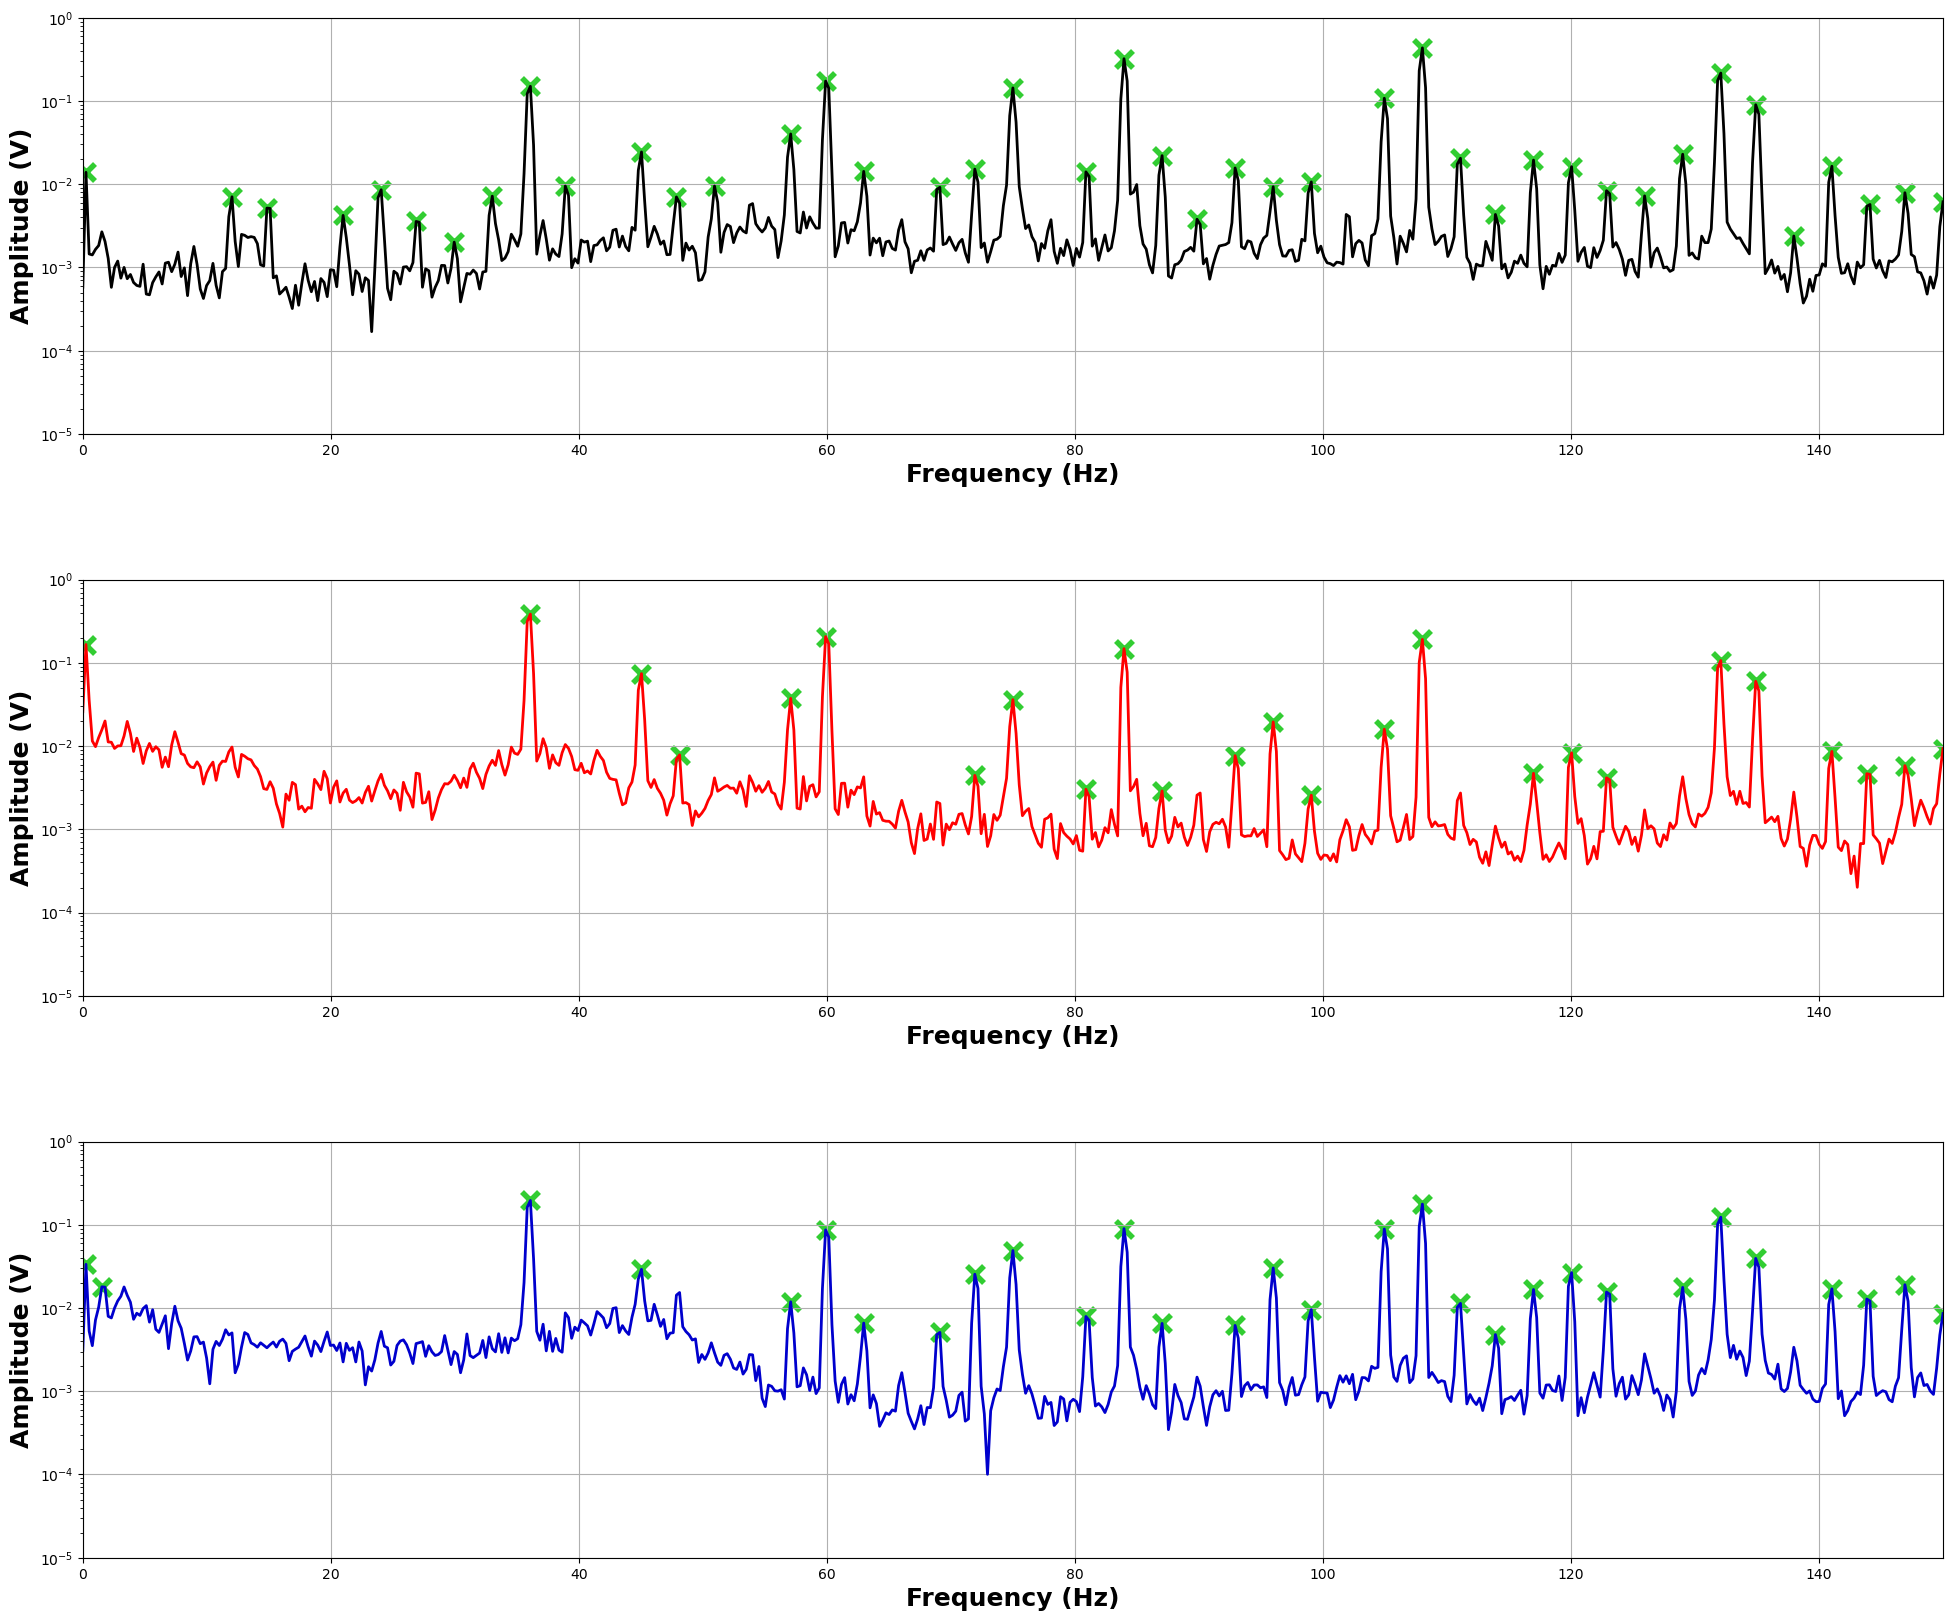

In [88]:
fig = plt.figure(figsize = (24,20))#, dpi = 2500)

gs = gridspec.GridSpec(3,1, height_ratios = [1,1,1], hspace = 0.35)

axis1 = fig.add_subplot(gs[0,0])

axis1.scatter(f_z[peak_z], Pxx_den_z[peak_z]**0.5, s = 150, color = 'limegreen', marker = 'x', linewidths = 4, label = 'Signal Peaks')
axis1.semilogy(f_z, Pxx_den_z ** 0.5, color = 'black', linewidth = 2, label = 'Channel Z')

axis1.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 18)
axis1.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 18)

axis1.set_ylim([10e-6, 1])
axis1.set_xlim(0,150)
axis1.grid(True)

################################################################################################################################

axis2 = fig.add_subplot(gs[1,0])

axis2.scatter(f_n[peak_n], Pxx_den_n[peak_n]**0.5, s = 150, color = 'limegreen', marker = 'x', linewidths = 4)
axis2.semilogy(f_n, Pxx_den_n ** 0.5, color = 'red', linewidth = 2, label = 'Channel N')

axis2.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 18)
axis2.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 18)

axis2.set_ylim([10e-6, 1])
axis2.set_xlim(0,150)
axis2.grid(True)

################################################################################################################################

axis3 = fig.add_subplot(gs[2,0])

axis3.scatter(f_e[peak_e], Pxx_den_e[peak_e]**0.5, s = 150, color = 'limegreen', marker = 'x', linewidths = 4)
axis3.semilogy(f_e, Pxx_den_e ** 0.5, color = 'mediumblue', linewidth = 2, label = 'Channel E')

axis3.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 18)
axis3.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 18)

axis3.set_ylim([10e-6, 1])
axis3.set_xlim(0,150)
axis3.grid(True)

#fig.legend(fontsize = 15)
#fig.suptitle("Channel Plots", fontweight = "bold", fontsize = 30)
#plt.subplots_adjust(right=10)
#fig.savefig("Channel_plot.pdf")